In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# For Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# For K Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


plt.style.use("ggplot")


In [2]:
df = pd.read_csv("D:/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200


In [2]:
df = pd.read_csv("E:/projects/data mining/clustring project/897/Country Data/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     164 non-null    float64
 3   health      166 non-null    float64
 4   imports     167 non-null    float64
 5   income      165 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  166 non-null    float64
 8   total_fer   166 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 13.2+ KB


In [4]:
df['exports'] = df['exports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100

In [3]:
df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,164.000000,166.000000,167.000000,165.000000,167.000000,166.000000,166.000000,167.000000
mean,38.270060,40.576213,6.836265,46.890215,17090.866667,7.781832,70.530723,2.933193,12964.155689
std,40.328931,27.329460,2.742209,24.209589,19342.772848,10.570704,8.914208,1.506308,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.725000,4.940000,30.200000,3340.000000,1.810000,65.300000,1.792500,1330.000000
50%,19.300000,35.000000,6.325000,43.300000,9960.000000,5.390000,73.100000,2.395000,4660.000000
75%,62.100000,50.825000,8.625000,58.750000,22700.000000,10.750000,76.800000,3.847500,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


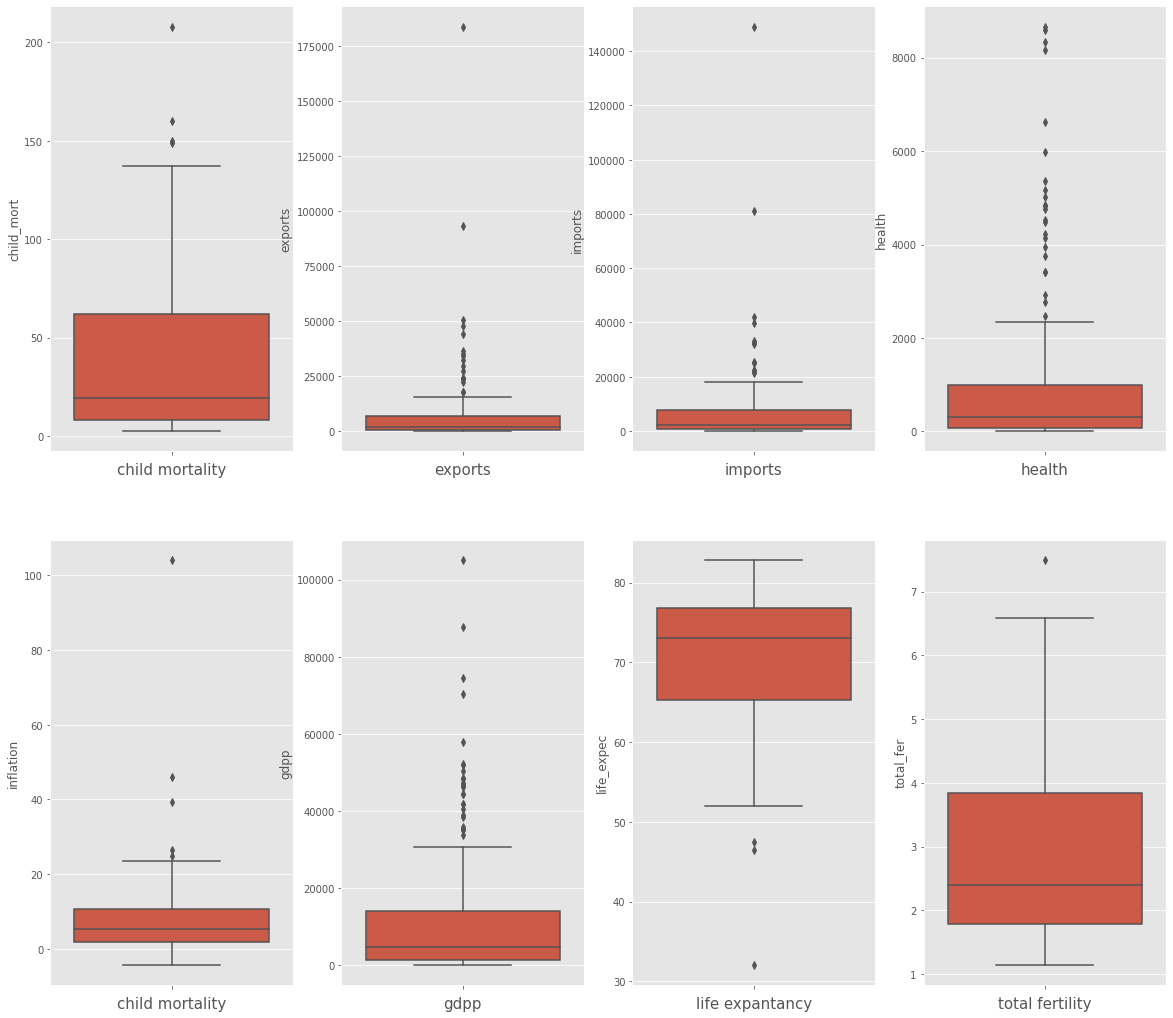

In [6]:
plt.figure(figsize=(20, 18))
plt.subplot(2,4,1)
sns.boxplot( y = 'child_mort', data =df)
plt.xlabel("child mortality",fontsize=15)
plt.subplot(2,4,2)
sns.boxplot( y = 'exports', data =df)
plt.xlabel("exports",fontsize=15)
plt.subplot(2,4,3)
sns.boxplot( y = 'imports', data =df)
plt.xlabel("imports",fontsize=15)
plt.subplot(2,4,4)
sns.boxplot( y = 'health', data =df)
plt.xlabel("health",fontsize=15)
plt.subplot(2,4,5)
sns.boxplot( y = 'inflation', data =df)
plt.xlabel("child mortality",fontsize=15)
plt.subplot(2,4,6)
sns.boxplot( y = 'gdpp', data =df)
plt.xlabel("gdpp",fontsize=15)
plt.subplot(2,4,7)
sns.boxplot( y = 'life_expec', data =df)
plt.xlabel("life expantancy",fontsize=15)
plt.subplot(2,4,8)
sns.boxplot( y = 'total_fer', data =df)
plt.xlabel("total fertility",fontsize=15)
plt.show()

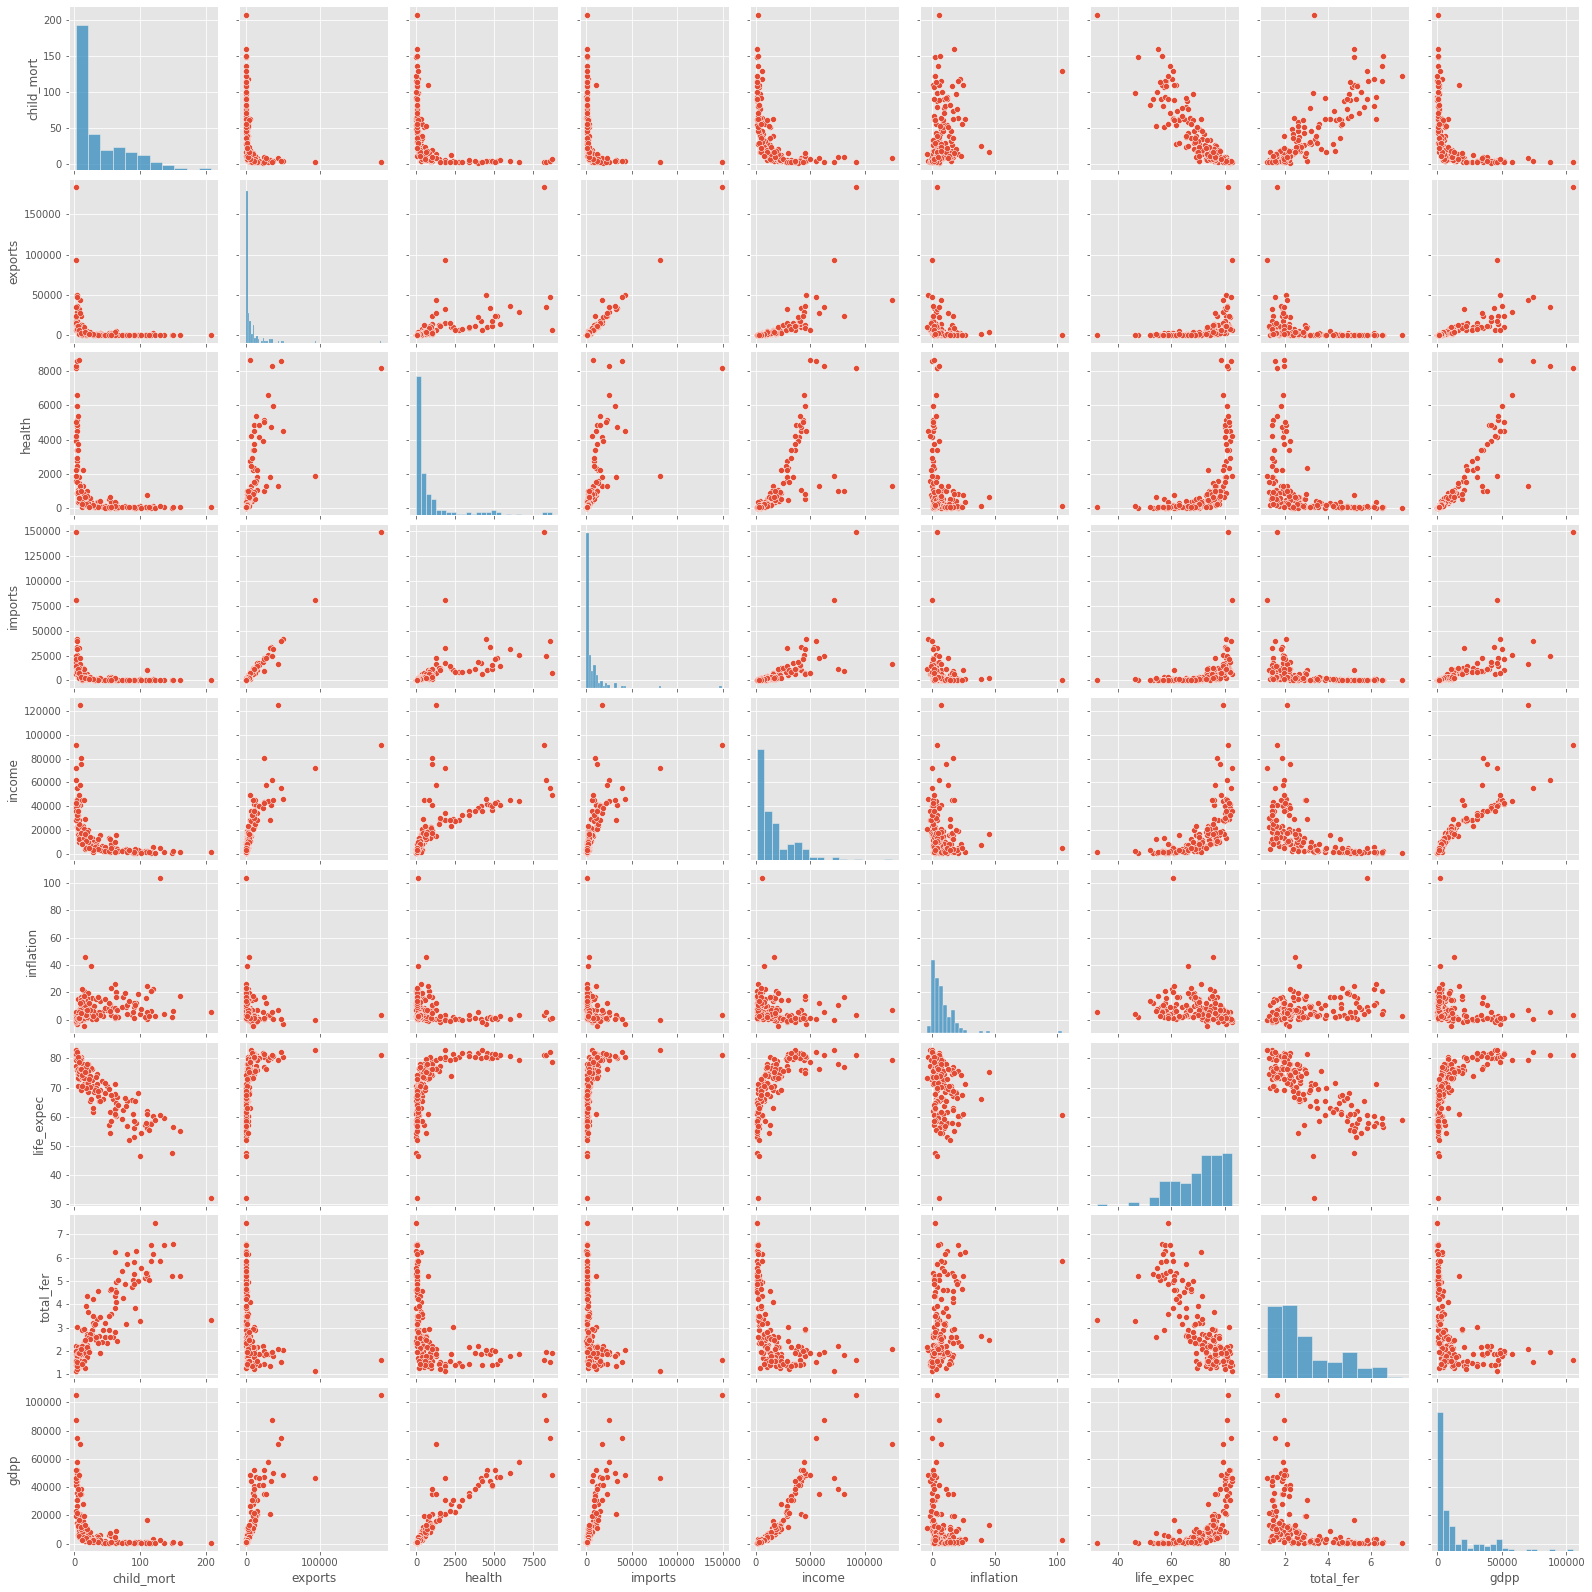

In [13]:
# Bivariate Analysis
######################################################################################
sns.pairplot(df)
plt.show()

In [ ]:
#plt.figure(figsize = (12,8))  
#sns.heatmap(country_df.corr(),annot = True, cmap='Blues')
#plt.show()

In [7]:
col = list(df.columns)
col

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [8]:
col = col[1:]
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

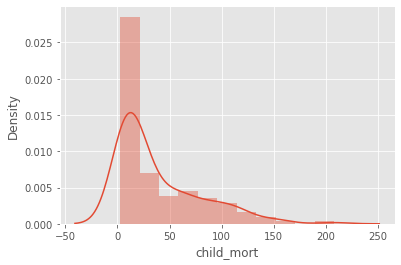

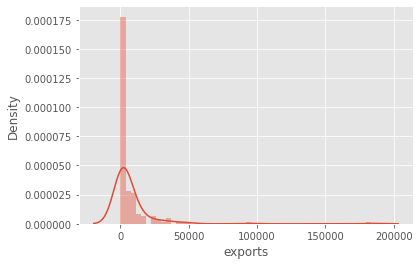

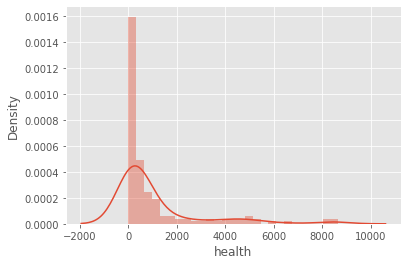

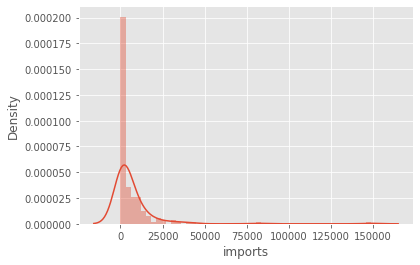

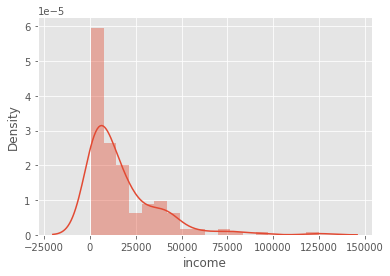

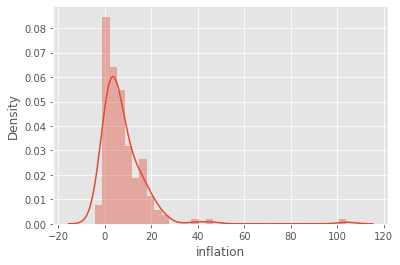

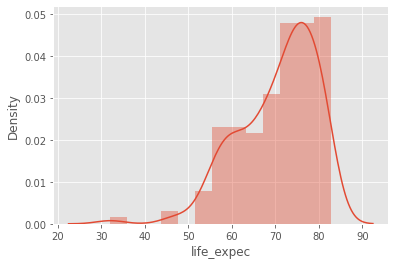

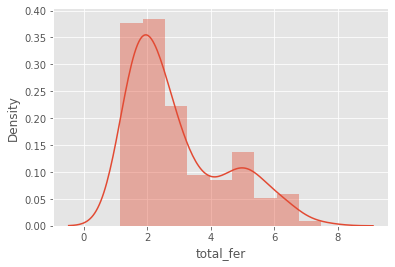

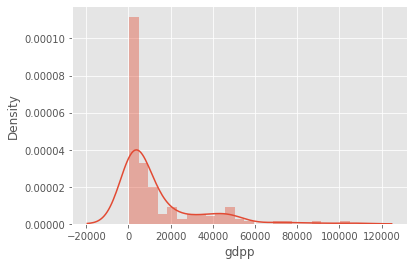

In [9]:
###############
for c in col:
    sns.distplot(df[c])
    plt.show();

<AxesSubplot:>

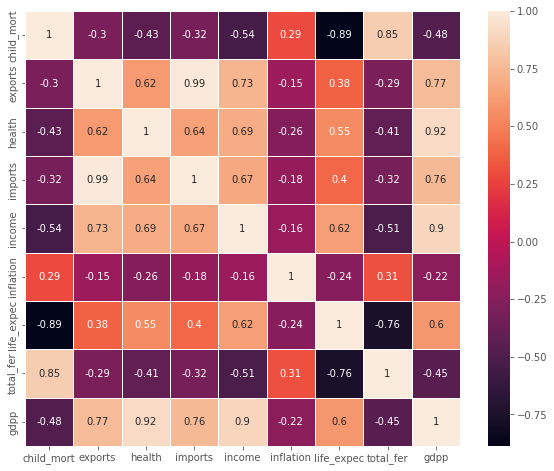

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df[col].corr(), annot=True,fmt='.2g',linewidths=1,square=True)

In [10]:
df.drop_duplicates(subset=None, inplace=True)

In [11]:
df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310


In [12]:
df.shape


(167, 10)

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     164 non-null    float64
 3   health      166 non-null    float64
 4   imports     167 non-null    float64
 5   income      165 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  166 non-null    float64
 8   total_fer   166 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 14.4+ KB


In [14]:
df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,164.000000,166.000000,167.000000,165.000000,167.000000,166.000000,166.000000,167.000000
mean,38.270060,7294.915656,1060.887019,6588.352108,17090.866667,7.781832,70.530723,2.933193,12964.155689
std,40.328931,18068.638469,1806.057100,14710.810418,19342.772848,10.570704,8.914208,1.506308,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,439.515000,77.714250,640.215000,3340.000000,1.810000,65.300000,1.792500,1330.000000
50%,19.300000,1763.530000,314.068000,2045.580000,9960.000000,5.390000,73.100000,2.395000,4660.000000
75%,62.100000,6688.125000,985.295000,7719.600000,22700.000000,10.750000,76.800000,3.847500,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
df.isnull().sum()

country       0
child_mort    0
exports       3
health        1
imports       0
income        2
inflation     0
life_expec    1
total_fer     1
gdpp          0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

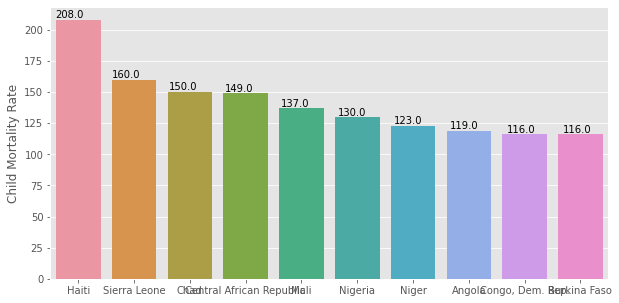

In [18]:
plt.figure(figsize = (10,5))
child_mort_top10 = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
#plt.xticks(rotation=90)
plt.show()

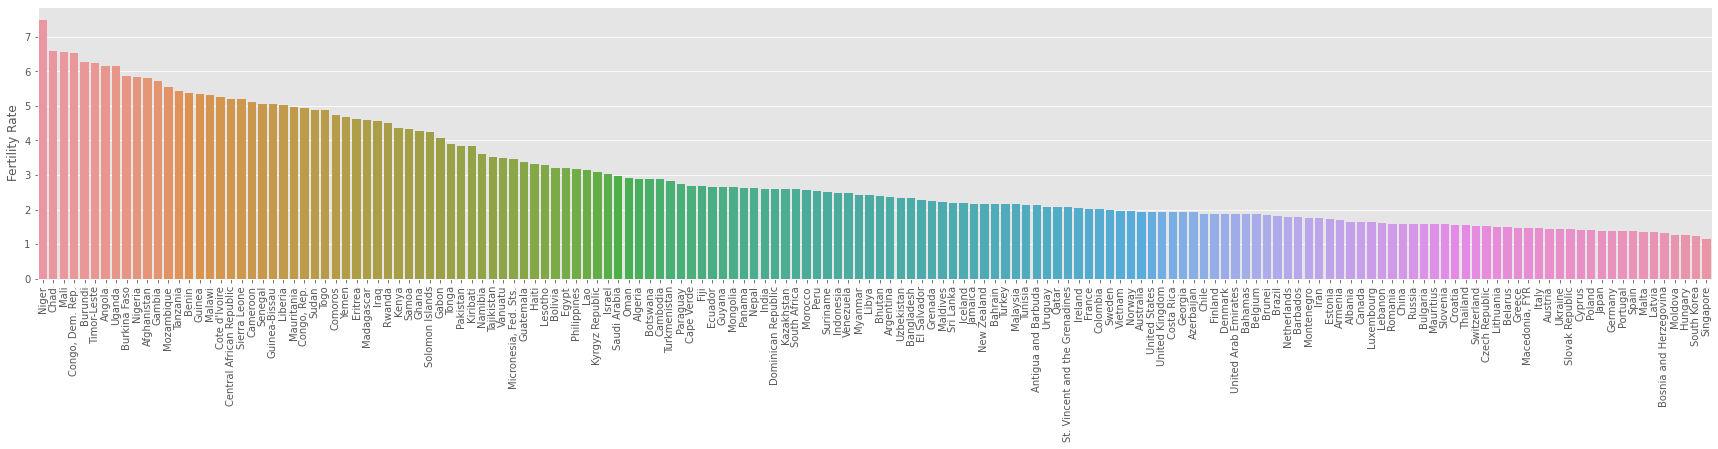

In [19]:
###################################
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize = (30,5))
total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

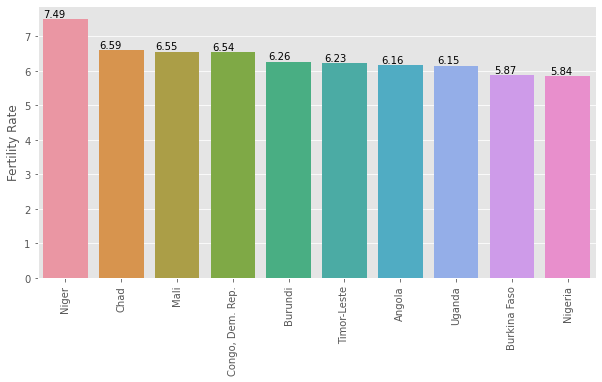

In [20]:
plt.figure(figsize = (10,5))
total_fer_top10 = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

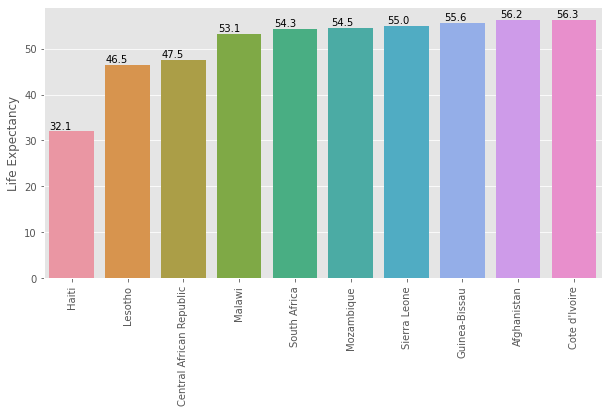

In [21]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

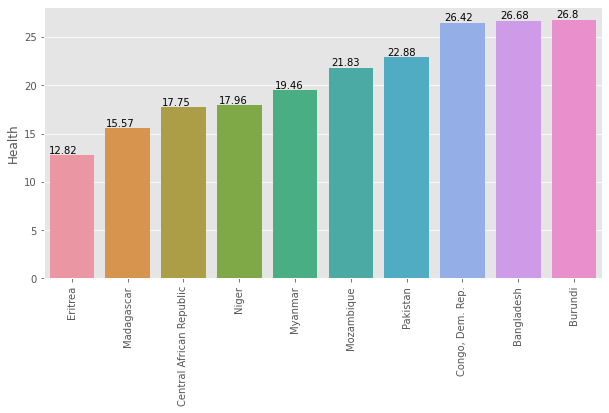

In [22]:
plt.figure(figsize = (10,5))
health_bottom10 = df[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

In [23]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,437.46,80.1780,393.300,4240.0,16.50,68.8,2.34,1380
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310


In [24]:
child_mort = df[['country',
                              'child_mort']].groupby('country', as_index=False).sum().sort_values('child_mort', ascending = True).head(10)
child_mort.head(20)

,country,child_mort
66,Iceland,2.6
87,Luxembourg,2.8
127,Singapore,2.8
138,Sweden,3.0
51,Finland,3.0
75,Japan,3.2
129,Slovenia,3.2
110,Norway,3.2
42,Czech Republic,3.4
41,Cyprus,3.6


In [25]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Text(0.5, 1.0, 'country   child_mort')

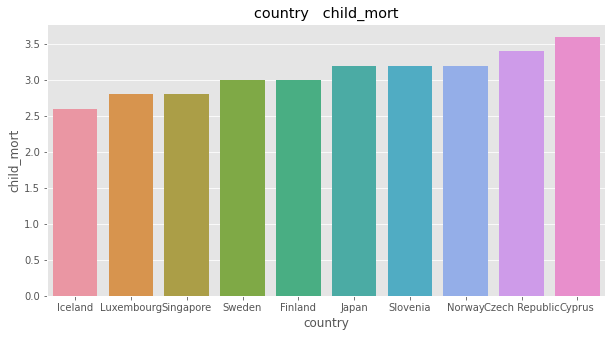

In [26]:
plt.figure(figsize = [10, 5])
sns.barplot(x ='country', y ='child_mort', data =child_mort)
plt.ticklabel_format(style = 'plain', axis ='y')
plt.title('country   child_mort')

Text(0.5, 1.0, 'country  income')

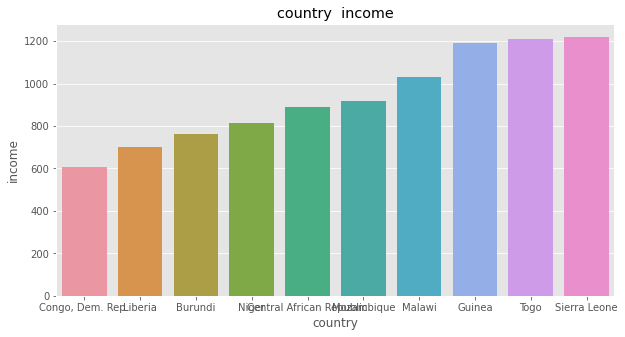

In [27]:
income = df[['country','income']].groupby('country', as_index=False).sum().sort_values('income', ascending = True).head(10)

plt.figure(figsize = [10, 5])
sns.barplot(x ='country', y ='income', data =income)
plt.ticklabel_format(style = 'plain', axis ='y')
plt.title('country  income')


Text(0.5, 1.0, 'country  exports')

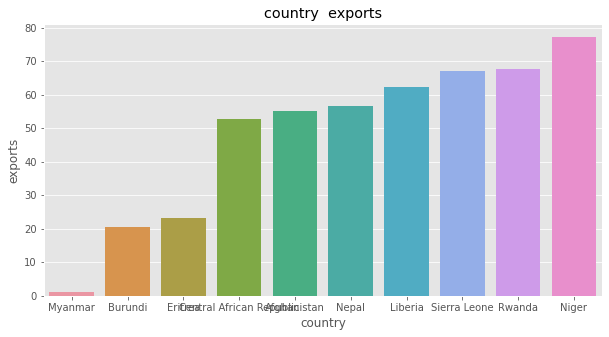

In [28]:
exports = df[['country','exports']].groupby('country', as_index=False).sum().sort_values('exports', ascending = True).head(10)

plt.figure(figsize = [10, 5])
sns.barplot(x ='country', y ='exports', data =exports)
plt.ticklabel_format(style = 'plain', axis ='y')
plt.title('country  exports')


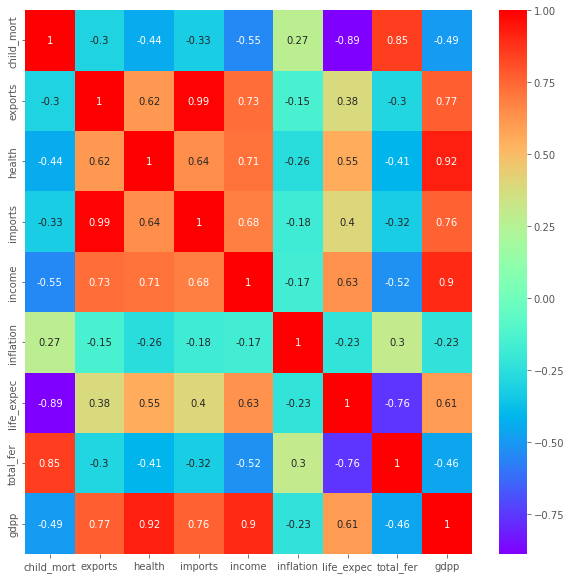

In [29]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

• If the value is between {0.01, ...,0.3}, the data is regularly spaced.

• If the value is around 0.5, it is random.

• If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [30]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [31]:
df_copy = df.copy()
country = df_copy.pop('country')

In [32]:
# Hopkins score
Hopkins_score=round(hopkins(df_copy),2)

In [33]:
print("{} is a good Hopkins score for Clustering.".format(Hopkins_score))


0.98 is a good Hopkins score for Clustering.


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy)

In [35]:
df1 = pd.DataFrame(df_scaled, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.288679,-0.402531,-0.568622,-0.425934,-0.804225,0.160321,-1.624340,1.909901,-0.674181
1,-0.537998,-0.342704,-0.445107,-0.309604,-0.365988,-0.306198,0.642574,-0.850385,-0.482960
2,-0.272435,-0.311556,-0.489879,-0.348881,-0.209550,0.788003,0.665131,-0.029580,-0.462956
3,2.003466,-0.284848,-0.536545,-0.341262,-0.578259,1.381755,-1.184491,2.134960,-0.513235
4,-0.694358,-0.100858,-0.189435,0.038033,0.117021,-0.593650,0.698965,-0.532654,-0.044509


In [36]:
    km = KMeans(n_clusters =3, max_iter=150,random_state= 50)
    km.fit(df1)


KMeans(max_iter=150, n_clusters=3, random_state=50)

In [37]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.288679,-0.402531,-0.568622,-0.425934,-0.804225,0.160321,-1.624340,1.909901,-0.674181
1,-0.537998,-0.342704,-0.445107,-0.309604,-0.365988,-0.306198,0.642574,-0.850385,-0.482960
2,-0.272435,-0.311556,-0.489879,-0.348881,-0.209550,0.788003,0.665131,-0.029580,-0.462956
3,2.003466,-0.284848,-0.536545,-0.341262,-0.578259,1.381755,-1.184491,2.134960,-0.513235
4,-0.694358,-0.100858,-0.189435,0.038033,0.117021,-0.593650,0.698965,-0.532654,-0.044509


In [38]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df1, km.labels_)

In [39]:
silhouette_avg

0.4201427333904489

In [40]:
df['Cluster_Id'] = km.labels_
df.head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200,0
5,Argentina,14.5,1946.7000,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300,0
6,Armenia,18.1,669.7600,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220,0
7,Australia,4.8,10276.2000,4530.8700,10847.100,41400.0,1.160,82.0,1.93,51900,1
8,Austria,4.3,24059.7000,5159.0000,22418.200,43200.0,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840,0


In [41]:
df.Cluster_Id.value_counts(ascending=True)


1    27
2    46
0    87
Name: Cluster_Id, dtype: int64

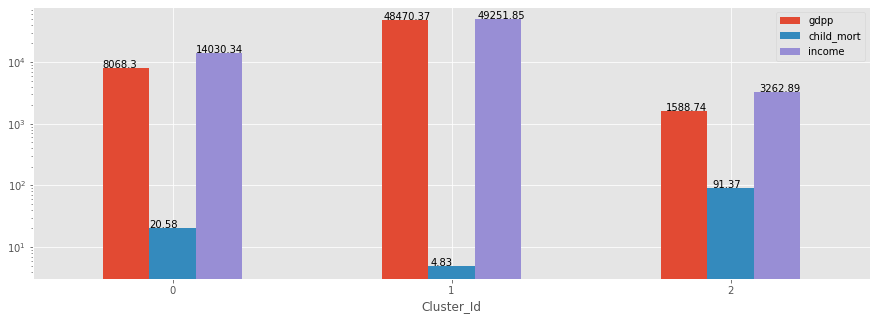

In [42]:
ax=df[['gdpp','child_mort','income','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

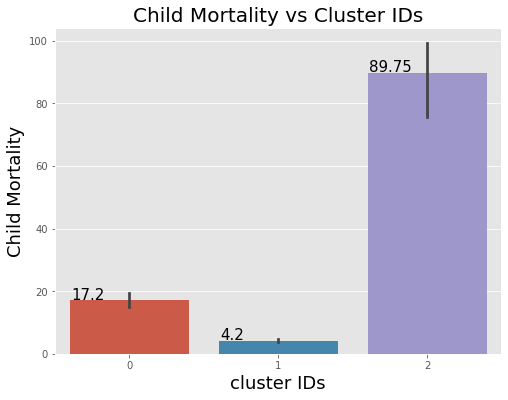

In [43]:
plt.figure(figsize=(8,6))
figx=sns.barplot(x='Cluster_Id', y='child_mort',estimator=np.median, data=df)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Child Mortality",fontsize=18,color='black')
plt.title("Child Mortality vs Cluster IDs",fontsize=20,color='black')
for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

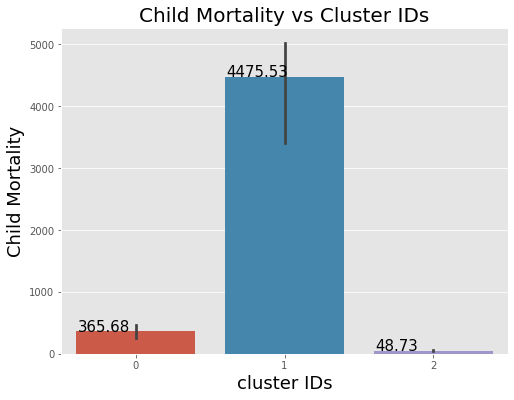

In [111]:
plt.figure(figsize=(8,6))
figx=sns.barplot(x='Cluster_Id', y='health',estimator=np.median, data=df)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("health",fontsize=18,color='black')
plt.title("health vs Cluster IDs",fontsize=20,color='black')
for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

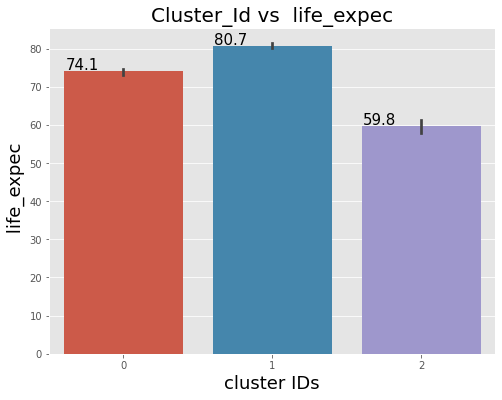

In [113]:

plt.figure(figsize=(8,6))
figx=sns.barplot(x='Cluster_Id', y='life_expec',estimator=np.median, data=df)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel(" life_expec",fontsize=18,color='black')
plt.title("Cluster_Id vs  life_expec",fontsize=20,color='black')
for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()


In [ ]:
###############################################################################################################3

In [ ]:
##############################################################################################################################

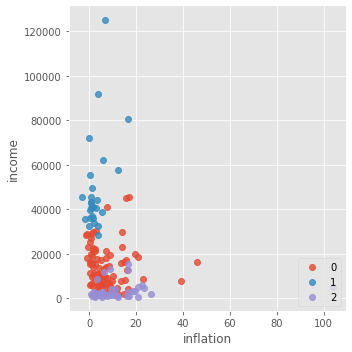

In [117]:
sns.lmplot(x='inflation', y='income', data=df, fit_reg=False, hue='Cluster_Id', legend=False)
plt.legend(loc='lower right')

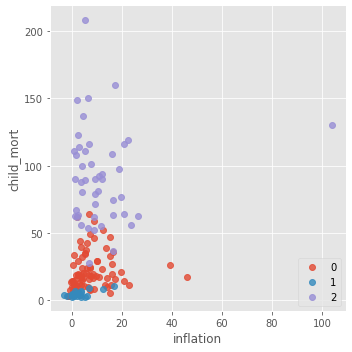

In [118]:
sns.lmplot(x='inflation', y='child_mort', data=df, fit_reg=False, hue='Cluster_Id', legend=False)
plt.legend(loc='lower right')